<h1 style="text-align:center; color:#000080; font-weight:bold; font-size:38px;">Mobile Price Prediction</h1>

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:30px;">Dataset Description</h1>

* <span style='color:#000080; font-size:18px;'>**Brand: the manufacturer of the phone**</span>
* <span style='color:#000080; font-size:18px;'>**Model: the name of the phone model**</span>
* <span style='color:#000080; font-size:18px;'>**Storage (GB): the amount of storage space (in gigabytes) available on the phone**</span>
* <span style='color:#000080; font-size:18px;'>**RAM (GB): the amount of RAM (in gigabytes) available on the phone**</span>
* <span style='color:#000080; font-size:18px;'>**Screen Size (inches): the size of the phone's display screen in inches**</span>
* <span style='color:#000080; font-size:18px;'>**Camera (MP): the megapixel count of the phone's rear camera(s)**</span>
* <span style='color:#000080; font-size:18px;'>**Battery Capacity (mAh): the capacity of the phone's battery in milliampere hours**</span>
* <span style='color:#000080; font-size:18px;'>**Price ($): the retail price of the phone in US dollars**</span>

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Import Libraries</h1>

In [1]:
# Cleaning and Viualization Libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.subplots as sp
import plotly.colors as cl
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import re

In [2]:
# ml tools
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   OneHotEncoder,
                                   RobustScaler,
                                   LabelEncoder,
                                   power_transform,
                                   FunctionTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import ( cross_val_predict,
                                     cross_val_score,
                                     train_test_split,
                                     GridSearchCV,
                                     StratifiedKFold,
                                    RandomizedSearchCV)

from sklearn.pipeline import Pipeline , make_pipeline
from scipy.stats import randint
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

In [3]:
#Classification models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#Regression models
from sklearn.ensemble import (RandomForestRegressor,
                                ExtraTreesRegressor,
                                BaggingRegressor,
                                GradientBoostingRegressor,
                                HistGradientBoostingRegressor)

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [4]:
# metrics
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             log_loss,
                             classification_report,
                             confusion_matrix)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Remove Warnings</h1>

In [5]:
import warnings
warnings.simplefilter("ignore")

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;"> Reading the data</h1>

In [6]:
df=pd.read_csv('Mobile phone price.csv')
display(df.head(), df.tail())

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429
406,Samsung,Galaxy S10 Lite,128,6,6.7,48+12+5,4500,649


<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;"> Data Exploration</h1>

In [7]:
df.shape

(407, 8)

In [8]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


* ***There are some mistyped columns***
* ***We will fix this problem while cleaning process for each column***

In [9]:
def show_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}':\n{unique_values}\n")

In [10]:
show_unique_values(df)

Unique values in 'Brand':
['Apple' 'Samsung' 'OnePlus' 'Xiaomi' 'Google' 'Oppo' 'Vivo' 'Realme'
 'Motorola' 'Nokia' 'Sony' 'LG' 'Asus' 'Blackberry' 'CAT' 'Huawei']

Unique values in 'Model':
['iPhone 13 Pro' 'Galaxy S21 Ultra' '9 Pro' 'Redmi Note 10 Pro' 'Pixel 6'
 'iPhone 13' 'Galaxy Z Flip3' 'Poco X3 Pro' 'Reno6 Pro+ 5G' 'X70 Pro+'
 'Nord CE 5G' 'Galaxy A52s 5G' 'GT Neo2' 'iPhone 12 Mini' 'Find X3 Pro'
 'Mi 11 Lite 5G NE' 'Galaxy S21' 'Y20s (G)' '8s 5G' 'A94' 'Redmi 10 Prime'
 'Galaxy A22 5G' 'Narzo 50 Pro 5G' '9' 'Redmi Note 10 Pro Max' 'iPhone 11'
 'Galaxy A03s' 'A74 5G' 'Y12s (2021)' '9i' 'Galaxy M52 5G' 'Redmi 10'
 'iPhone SE (2nd Gen)' 'A53s' 'Y33s' 'C25s' 'Galaxy A22 4G' 'Nord 2 5G'
 'Poco M3 Pro 5G' 'iPhone XR' 'A16' 'C21Y' 'Galaxy F22' 'F19 Pro+ 5G'
 'Mi 11X' 'V21e' '8 5G' 'Galaxy M12' 'A16s' 'Redmi 9 Power'
 'iPhone 11 Pro Max' 'Y20G' 'Narzo 50i' 'A54' 'Redmi 9T'
 'iPhone 13 Pro Max' 'Y33' 'Galaxy A72' 'Reno6 Pro 5G' 'iPhone SE (2020)'
 'Y53s' '7i' 'Galaxy A52 5G' 'F19 Pro' 

In [11]:
num_unique = df.nunique().sort_values(ascending=False)
pct_unique = (df.nunique().sort_values(ascending=False) / len(df) * 100).round(3)
pct_unique = pct_unique.astype(str) + '%'

unique = pd.DataFrame({
    'Unique Count': num_unique,
    'Percentage Unique': pct_unique
})
unique

,Unique Count,Percentage Unique
Model,239,58.722%
Camera (MP),143,35.135%
Price ($),89,21.867%
Battery Capacity (mAh),48,11.794%
Screen Size (inches),41,10.074%
RAM,20,4.914%
Brand,16,3.931%
Storage,13,3.194%


* ***There are no numerical columns with high unique pct so we will not do any discretization on them and we may consider dropping the model column***

In [12]:
num_null = df.isnull().sum().sort_values(ascending=False)
pct_null = (df.isnull().sum().sort_values(ascending=False) / len(df) * 100).round(3)
pct_null = pct_null.astype(str) + '%'

null = pd.DataFrame({
    'Null Count': num_null,
    'Percentage Null': pct_null
})
null

,Null Count,Percentage Null
Brand,0,0.0%
Model,0,0.0%
Storage,0,0.0%
RAM,0,0.0%
Screen Size (inches),0,0.0%
Camera (MP),0,0.0%
Battery Capacity (mAh),0,0.0%
Price ($),0,0.0%


* ***It looks like we do not have any missing values***


In [13]:
df.duplicated().sum()

26

* ***We have some duplicates so i will drop them***

In [14]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [15]:
df.shape

(381, 8)

In [16]:
df.columns = df.columns.str.strip()

* ***I fixed all columns names to not face any problem in the future***

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Summary statistics of the data</h1>

In [17]:
df.describe()

,Battery Capacity (mAh)
count,381.000000
mean,4683.958005
std,792.927831
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


In [18]:
df.describe(include = 'object')

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Price ($)
count,381,381,381,381,381,381,381
unique,16,239,13,20,41,143,89
top,Samsung,C21Y,128GB,4GB,6.5,13MP + 2MP + 2MP,$279
freq,73,5,120,67,100,28,15


<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Split The Data</h1>

In [19]:
x = df.drop('Price ($)',axis=1)
y = df[['Price ($)']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
80,Google,Pixel 6,128GB,8GB,6.4,50MP + 12MP,4600,$699
276,Samsung,Galaxy A11,32GB,2GB,6.4,13MP + 5MP + 2MP,4000,$129
95,Vivo,Y33s,128GB,8GB,6.58,50MP + 2MP + 2MP,5000,$269
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
284,Vivo,Y15,64GB,4GB,6.35,13MP + 8MP + 2MP,5000,$189


* ***I made this new dataset to viualize the data and decide what to put in the pipelines***

In [21]:
train.shape

(304, 8)

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Data Preprocessing</h1>

* <span style='color: #000080; font-weight: bold; font-style: italic;'>At first, I will split the data into categorical and numerical.</span>
* <span style='color: #000080; font-weight: bold; font-style: italic;'>Then, I want to check on the data distribution, wrong values, and outliers.</span>
* <span style='color: #000080; font-weight: bold; font-style: italic;'>After that, I will check on the skewness, and finally, I will check on correlation and feature engineering.</span>
* <span style='color: #000080; font-weight: bold; font-style: italic;'>We may use methods like  Winsorization and power transformations for example if it was needed.</span>
* <span style='color: #000080; font-weight: bold; font-style: italic;'>After all this, I will start making pipelines to do these preprocessing steps in them.</span>

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Camera (MP)</h1>

In [22]:
def extract_camera_megapixels(camera_col):
        megapixels = re.findall(r'\d+\.*\d*', str(camera_col))
        return max([float(mp) for mp in megapixels])
    
train['Number of Cameras'] = train['Camera (MP)'].str.count('\\+') + 1
train['Best Camera (MP)'] = train['Camera (MP)'].apply(extract_camera_megapixels)

In [23]:
train

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Number of Cameras,Best Camera (MP)
80,Google,Pixel 6,128GB,8GB,6.4,50MP + 12MP,4600,$699,2,50.0
276,Samsung,Galaxy A11,32GB,2GB,6.4,13MP + 5MP + 2MP,4000,$129,3,13.0
95,Vivo,Y33s,128GB,8GB,6.58,50MP + 2MP + 2MP,5000,$269,3,50.0
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049,3,64.0
284,Vivo,Y15,64GB,4GB,6.35,13MP + 8MP + 2MP,5000,$189,3,13.0
...,...,...,...,...,...,...,...,...,...,...
73,Xiaomi,Mi 11 Lite 5G,128 GB,6 GB,6.55,64 + 8 + 5,4250,369,3,64.0
108,Samsung,Galaxy S20 FE 5G,128GB,6GB,6.5,12MP + 12MP + 8MP,4500,$699,3,12.0
281,Xiaomi,Redmi Note 7,64GB,4GB,6.3,48MP + 5MP,4000,$159,2,48.0
367,Samsung,Galaxy S20 Ultra 5G,512,16,6.9,108+48+12+3D,5000,1399,4,108.0


<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Fixing the data types</h1>

In [24]:
def Dtypefix(df):
    def extract_numeric(column):
        return pd.to_numeric(df[column].apply(lambda x: int(re.sub('[^\d]', '', str(x)))), errors='coerce')

    def process_screen_size(x):
        return np.mean if '+' in str(x) else x

    df['Price ($)'] = extract_numeric('Price ($)')
    df['Storage'] = extract_numeric('Storage')
    df['RAM'] = extract_numeric('RAM')
    df['Screen Size (inches)'] = df['Screen Size (inches)'].apply(process_screen_size)
    df['Screen Size (inches)'] = pd.to_numeric(df['Screen Size (inches)'], errors='coerce')
    
    df = df.reset_index(drop=True)

    return df

In [25]:
train = Dtypefix(train)
train

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Number of Cameras,Best Camera (MP)
0,Google,Pixel 6,128,8,6.40,50MP + 12MP,4600,699,2,50.0
1,Samsung,Galaxy A11,32,2,6.40,13MP + 5MP + 2MP,4000,129,3,13.0
2,Vivo,Y33s,128,8,6.58,50MP + 2MP + 2MP,5000,269,3,50.0
3,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049,3,64.0
4,Vivo,Y15,64,4,6.35,13MP + 8MP + 2MP,5000,189,3,13.0
...,...,...,...,...,...,...,...,...,...,...
299,Xiaomi,Mi 11 Lite 5G,128,6,6.55,64 + 8 + 5,4250,369,3,64.0
300,Samsung,Galaxy S20 FE 5G,128,6,6.50,12MP + 12MP + 8MP,4500,699,3,12.0
301,Xiaomi,Redmi Note 7,64,4,6.30,48MP + 5MP,4000,159,2,48.0
302,Samsung,Galaxy S20 Ultra 5G,512,16,6.90,108+48+12+3D,5000,1399,4,108.0


In [26]:
train.dtypes

Brand                      object
Model                      object
Storage                     int64
RAM                         int64
Screen Size (inches)      float64
Camera (MP)                object
Battery Capacity (mAh)      int64
Price ($)                   int64
Number of Cameras           int64
Best Camera (MP)          float64
dtype: object

In [27]:
train.describe()

,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),Number of Cameras,Best Camera (MP)
count,304.000000,304.000000,302.000000,304.000000,304.000000,304.000000,304.000000
mean,124.315789,5.894737,6.463841,4680.861842,410.417763,3.131579,43.733553
std,67.769403,2.493974,0.330827,806.720837,306.169402,0.780828,24.651459
min,32.000000,2.000000,4.500000,1821.000000,99.000000,1.000000,8.000000
25%,64.000000,4.000000,6.430000,4300.000000,199.000000,3.000000,13.000000
50%,128.000000,6.000000,6.500000,5000.000000,299.000000,3.000000,48.000000
75%,128.000000,8.000000,6.595000,5000.000000,476.500000,4.000000,64.000000
max,512.000000,16.000000,6.900000,7000.000000,1999.000000,4.000000,108.000000


In [28]:
# splitting the data into cat and num to make it easier in EDA

train_num_features = train.select_dtypes(include=['float64', 'int64']).columns.difference(['Price ($)'])

train_cat_features = train.select_dtypes(include=['object']).columns


<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Data Label</h1>

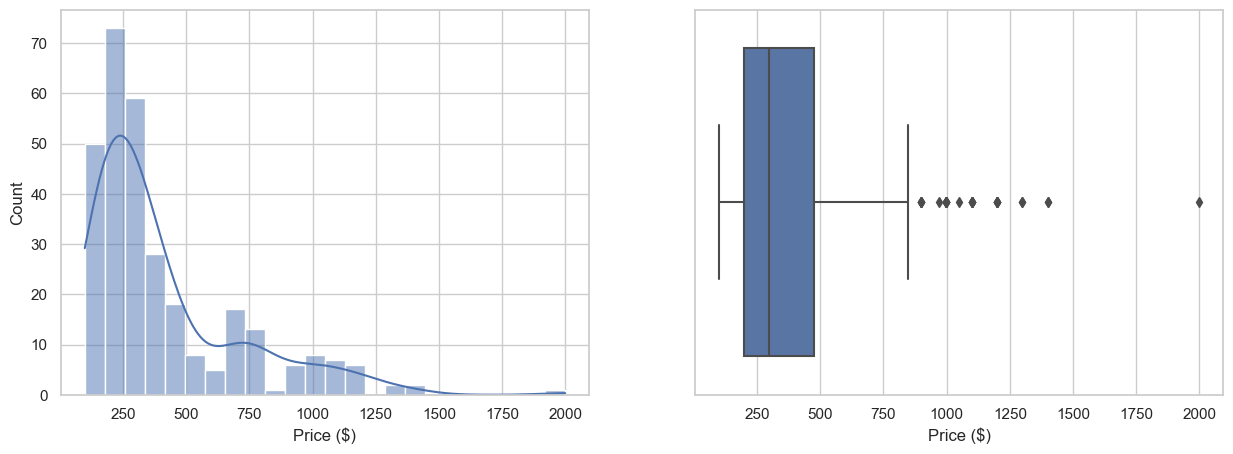

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=train, x="Price ($)", ax=axes[0],kde=True,palette="Blues")
sns.boxplot(data=train, x="Price ($)", ax=axes[1])

plt.show()

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Cat features</h1>

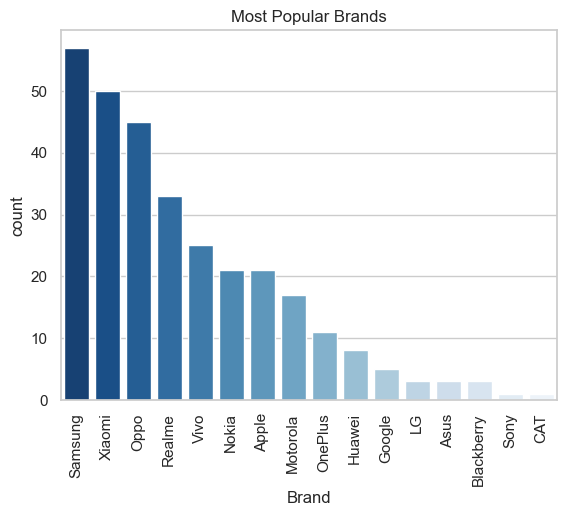

In [30]:
order = train['Brand'].value_counts().index

sns.countplot(x='Brand', data=train, order=order, palette="Blues_r")
plt.title('Most Popular Brands')
plt.xticks(rotation=90) 
plt.show()

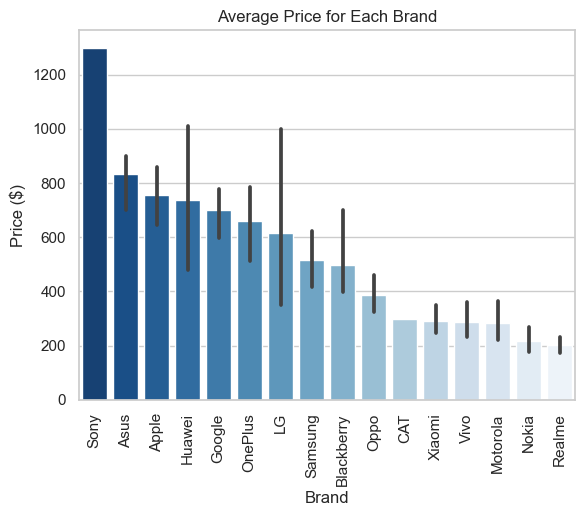

In [31]:
average_prices = train.groupby('Brand')['Price ($)'].mean().reset_index()
order = average_prices.sort_values('Price ($)', ascending=False)['Brand']

sns.barplot(x='Brand', y='Price ($)', data=train, order=order, palette="Blues_r")
plt.title('Average Price for Each Brand')
plt.xticks(rotation=90) 
plt.show()

In [32]:
average_prices.sort_values('Price ($)', ascending=False)

,Brand,Price ($)
13,Sony,1299.000000
1,Asus,832.333333
0,Apple,756.142857
5,Huawei,737.750000
4,Google,699.000000
9,OnePlus,659.000000
6,LG,615.666667
12,Samsung,517.614035
2,Blackberry,499.000000
10,Oppo,387.444444


In [33]:
average_prices_2 = train.groupby('Model')['Price ($)'].mean().reset_index()
average_prices_2.sort_values('Price ($)', ascending=False)

,Model,Price ($)
95,Galaxy Z Fold2 5G,1999.0
140,P40 Pro+,1399.0
84,Galaxy Note 20 Ultra,1299.0
88,Galaxy S20 Ultra 5G,1299.0
181,Xperia 5 III,1299.0
...,...,...
40,C20 Plus,104.0
129,Narzo 50i,99.0
110,Moto E7i Power,99.0
39,C20,99.0


<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Num features</h1>

In [34]:
def num_plot_dist(df):
    num_features = df.select_dtypes(include='number').columns
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
    
    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i, 0], kde=True, palette="Blues")
        axes[i, 0].set_title(f'Histogram with KDE for {column}')
        
        sns.boxplot(data=df, x=column, ax=axes[i, 1], palette="Blues")
        axes[i, 1].set_title(f'Box Plot for {column}')
    
    plt.tight_layout()
    plt.show()

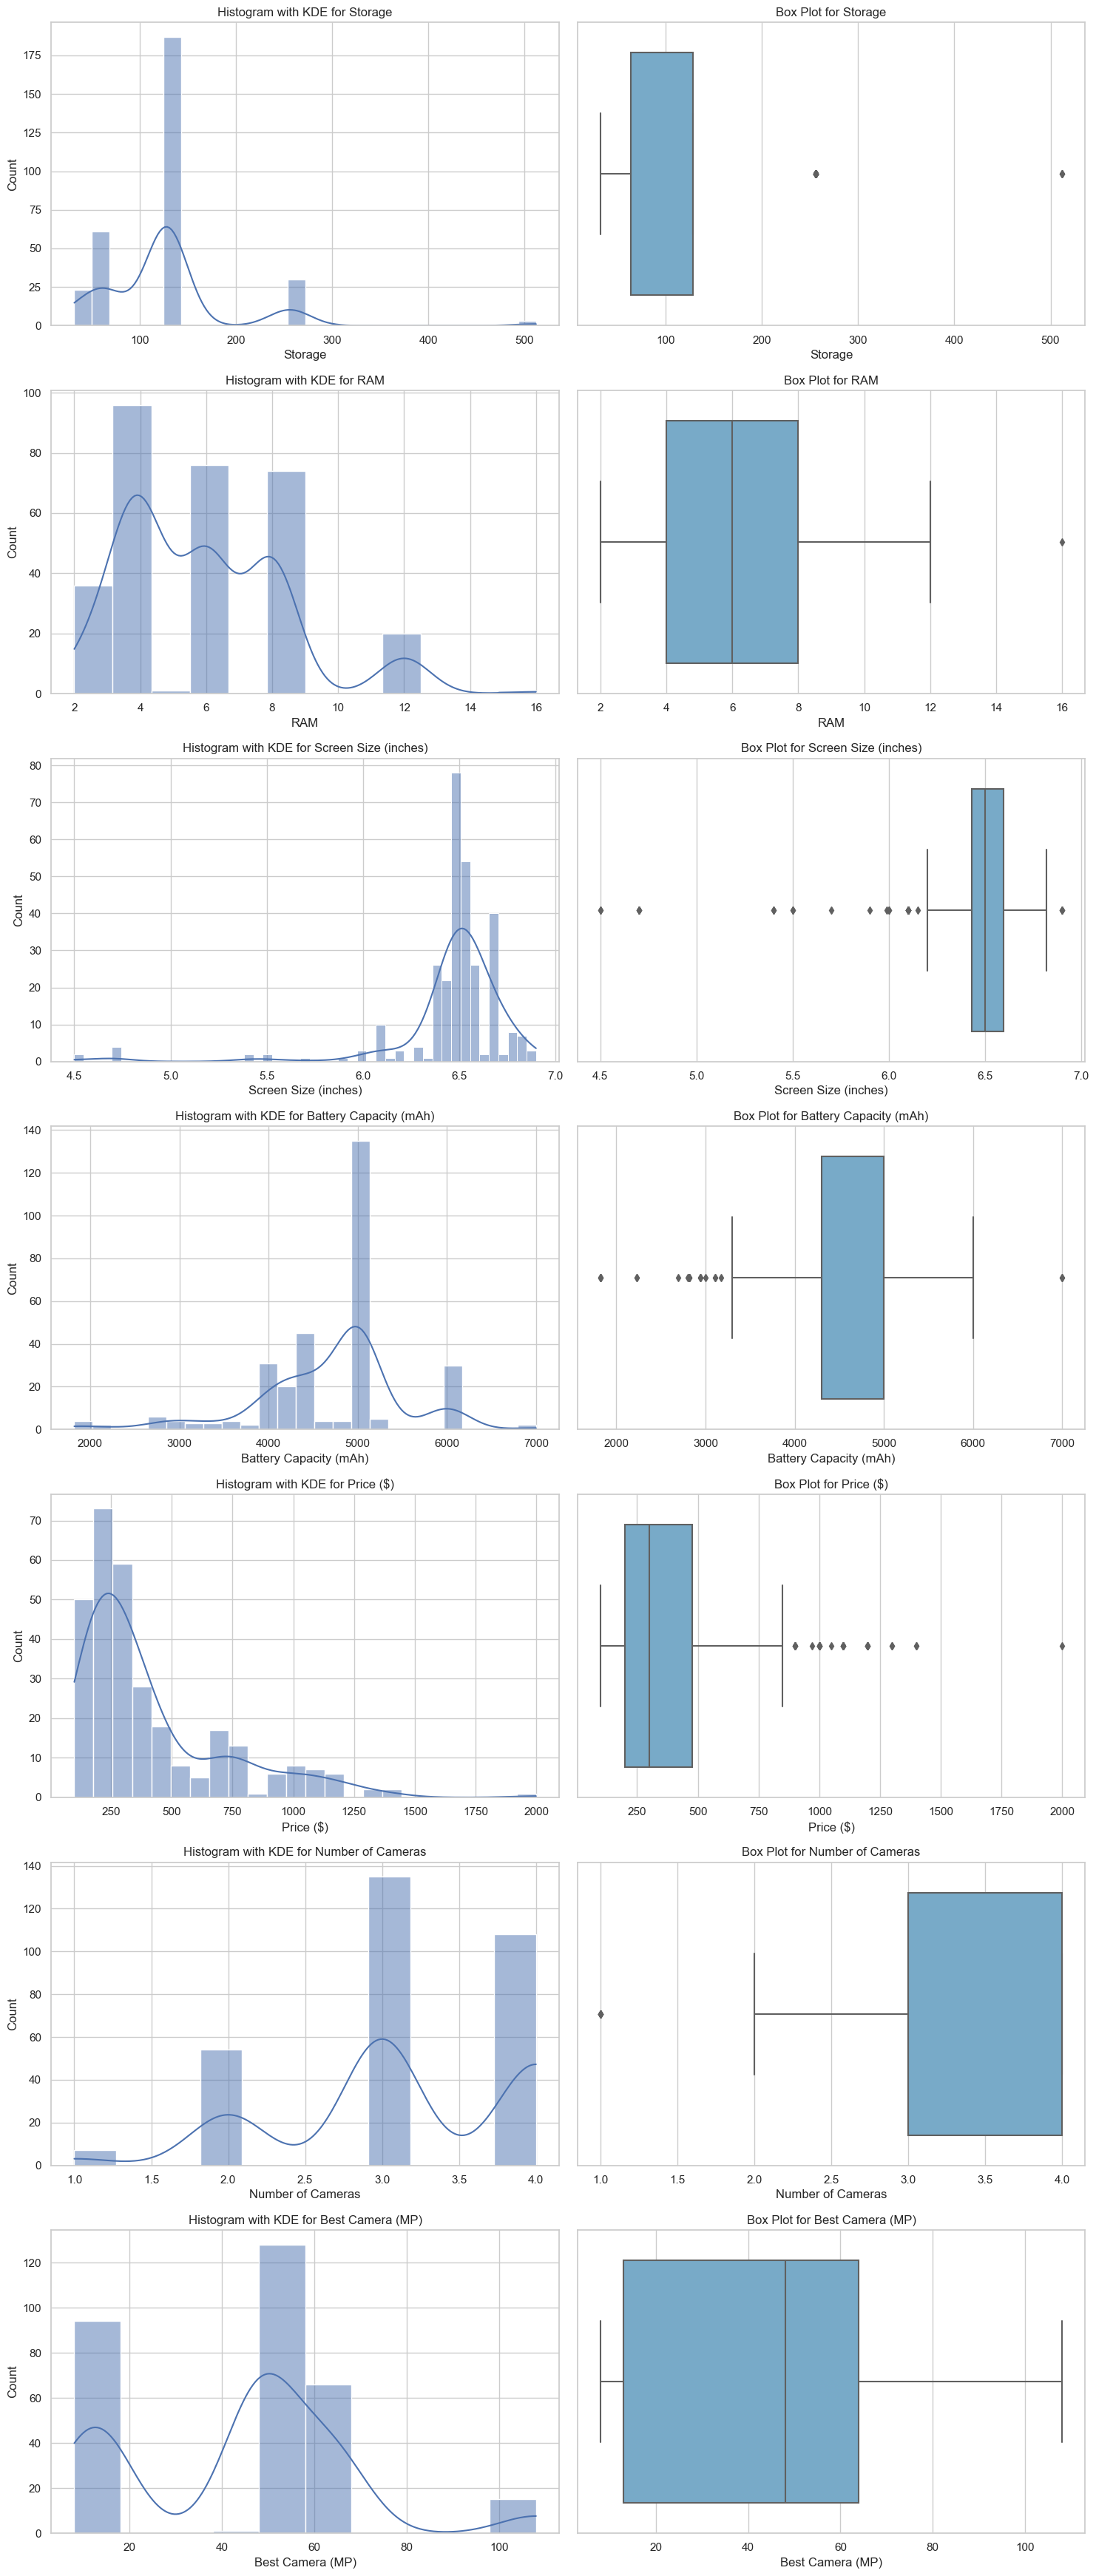

In [35]:
num_plot_dist(train)

In [36]:
def num_plot_price(df, num_features):
    fig, axes = plt.subplots(3, 2, figsize=(15, 18))
    
    for i, column in enumerate(num_features):
        row = i // 2
        col = i % 2
        sns.scatterplot(data=df, x=column, y='Price ($)', ax=axes[row, col], palette="Blues")
        axes[row, col].set_title(f'Scatter Plot for {column} vs Price ($)')

    plt.tight_layout()
    plt.show()

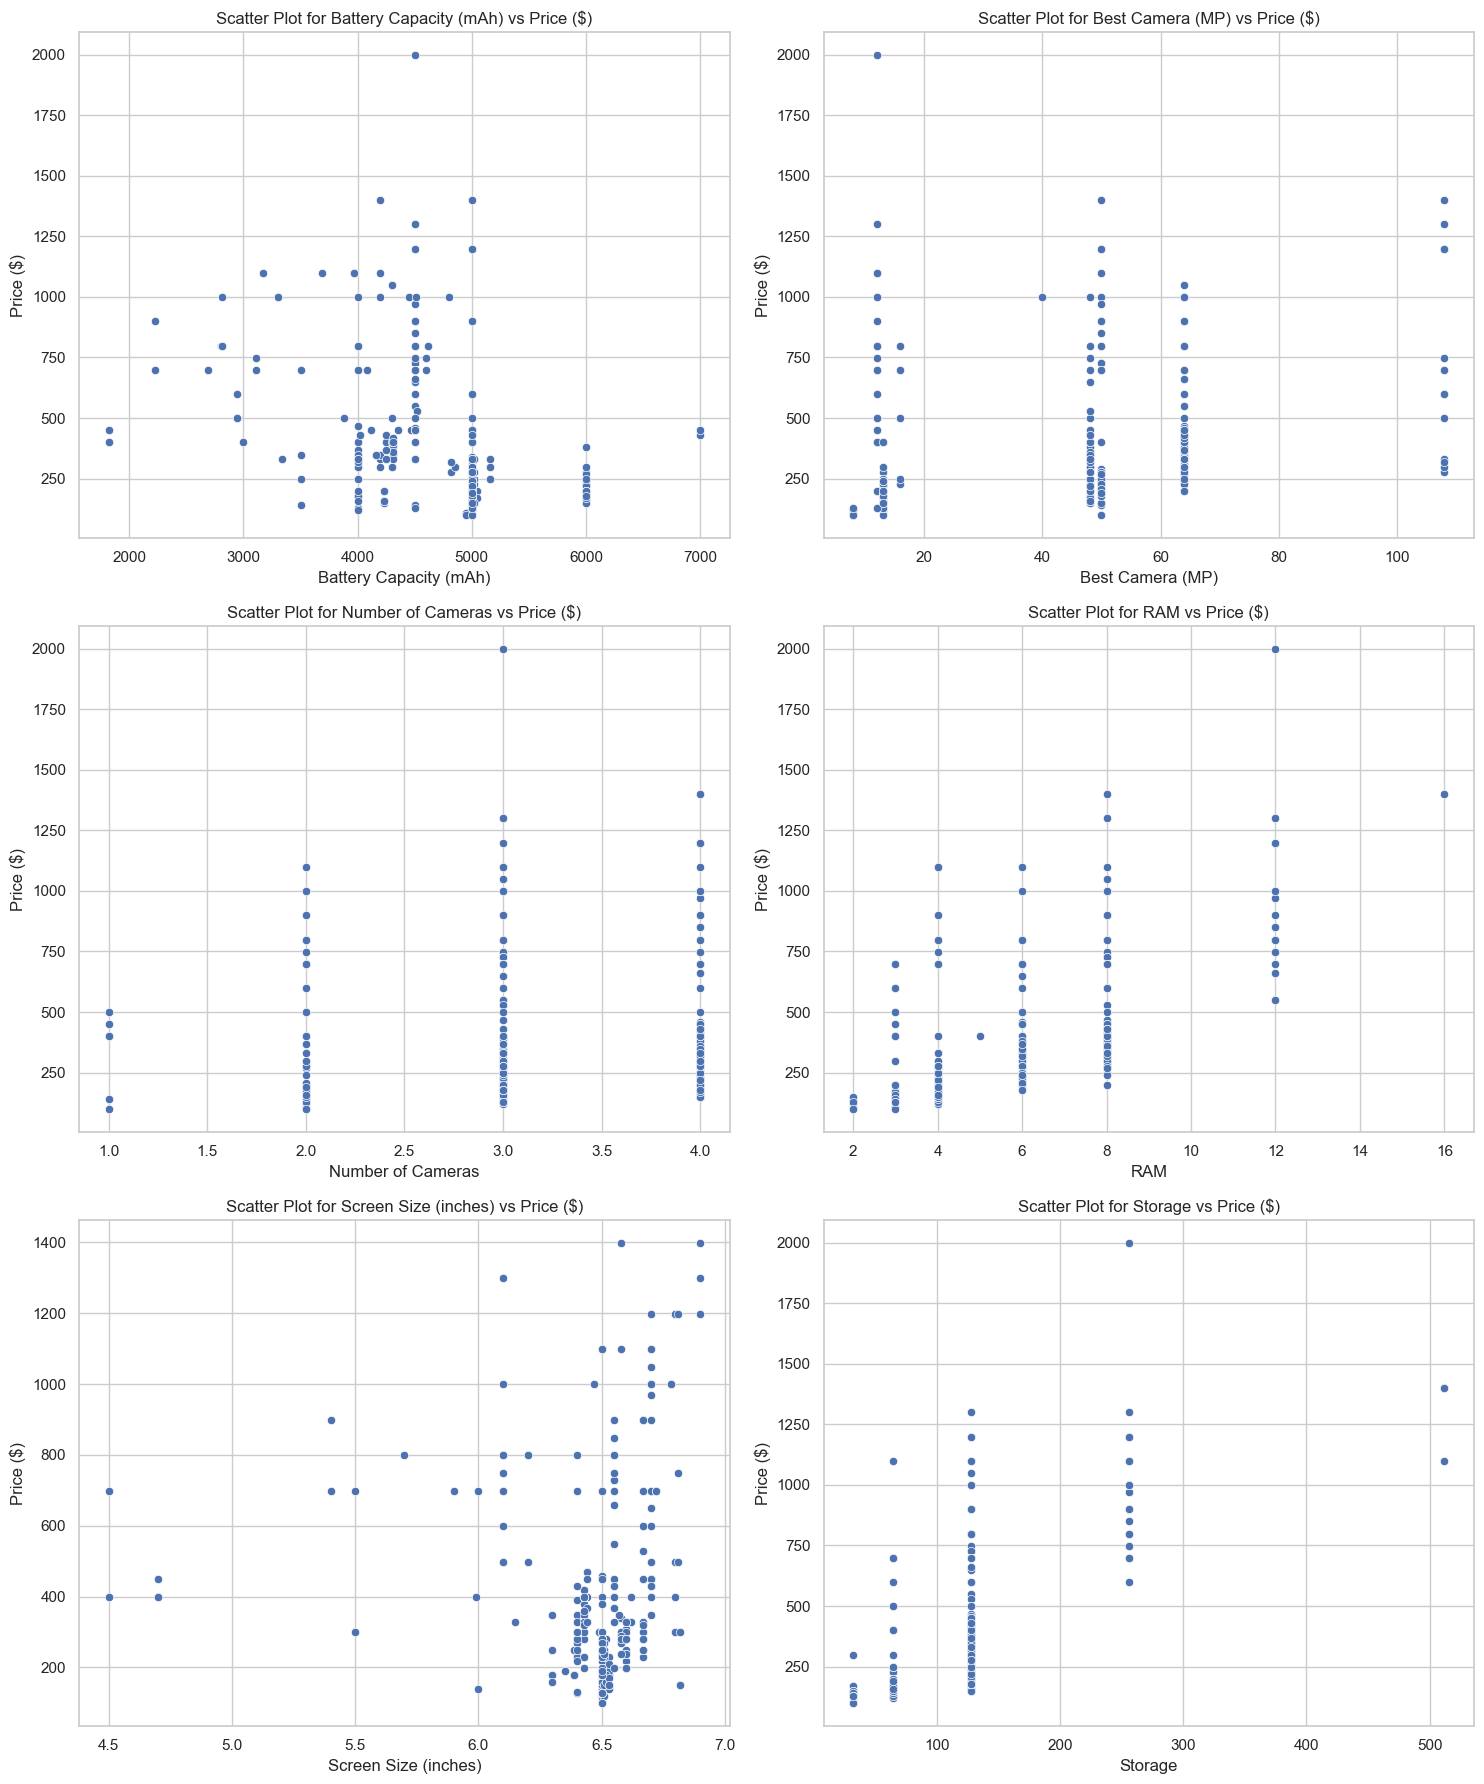

In [37]:
num_plot_price(train,train_num_features)

In [38]:
# This shows the PCT of the outliers in the data

def outliers_pct(df):

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df < lower_bound) | (df > upper_bound)).sum()
    outliers_pct = (outliers / len(df))*100

    return outliers_pct

In [39]:
outliers_pct(train[train_num_features])

Battery Capacity (mAh)     6.907895
Best Camera (MP)           0.000000
Number of Cameras          2.302632
RAM                        0.328947
Screen Size (inches)       9.539474
Storage                   10.855263
dtype: float64

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:20px;">Skewness Handiling</h1>

In [40]:
train[train_num_features].skew()

Battery Capacity (mAh)   -0.788786
Best Camera (MP)          0.370496
Number of Cameras        -0.527674
RAM                       0.949500
Screen Size (inches)     -3.826069
Storage                   2.261159
dtype: float64

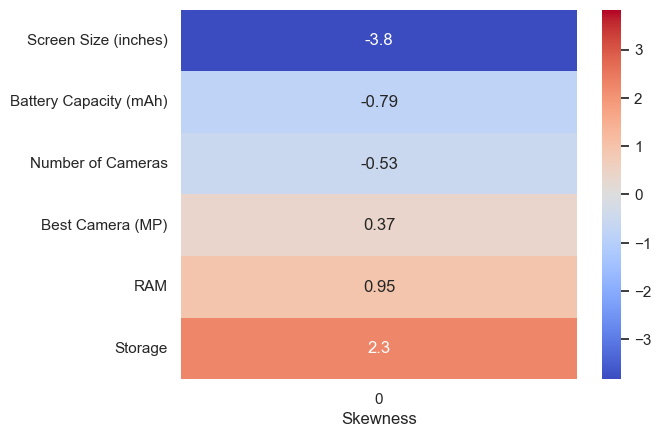

In [41]:
skewness_df = pd.DataFrame(train[train_num_features].skew().sort_values())
center_value = 0

sns.heatmap(skewness_df, cmap='coolwarm', annot=True, cbar=True,
            center=center_value, vmin=-abs(skewness_df).max().max(), vmax=abs(skewness_df).max().max())

plt.xlabel('Skewness')

plt.show()

* ***We have high skewness in some columns***

In [42]:
transformations = [
    ('Original', lambda x: x),
    
    ('Log Transform', lambda x: np.log(x+0.1)),
    
    ('Square Root Transform', lambda x: np.sqrt(x)),
    
    ('Box-Cox Transform', lambda x: stats.boxcox(x)[0])
]

skewness_train = pd.DataFrame(columns=["Column", "Original Skewness", "Transformed Skewness"])

# Loop through numerical columns and compare skewness for each transformation
for col in train_num_features:
    original_skewness = train[col].skew()
    best_transform = None
    best_skewness = float('inf')
    
    for transform_name, transform_func in transformations:
        transformed_data = transform_func(train[col].values)  
        transformed_series = pd.Series(transformed_data)  
        skewness = transformed_series.skew()
        
        if abs(skewness) < abs(best_skewness):
            best_skewness = skewness
            best_transform = transform_name
    
    skewness_train = skewness_train.append({"Column": col, "Original Skewness": original_skewness, "Transformed Skewness": best_skewness, "Best Transformation": best_transform}, ignore_index=True)

print(skewness_train)

                   Column  Original Skewness  Transformed Skewness  \
0  Battery Capacity (mAh)          -0.788786              0.108593   
1        Best Camera (MP)           0.370496             -0.160215   
2       Number of Cameras          -0.527674             -0.170996   
3                     RAM           0.949500             -0.002688   
4    Screen Size (inches)          -3.826069             -1.105702   
5                 Storage           2.261159              0.034780   

  Best Transformation  
0   Box-Cox Transform  
1   Box-Cox Transform  
2   Box-Cox Transform  
3   Box-Cox Transform  
4   Box-Cox Transform  
5   Box-Cox Transform  


* ***<span style='color:#ff0000;'>Notes :</span>***
    
    * **The log transformation requires that the input data is not equal to zero so that the result is not equal to -inf,
        the constant (0.1) added is chosen to be very small to avoid significant distortions to the original data.**
    * **The Box-Cox transformation requires that the input data is strictly positive.**

In [43]:
def apply_boxcox(df, num_features):
    for col in num_features:
        df[col], lambda_value = stats.boxcox(df[col])

    return df

In [44]:
apply_boxcox(train, train_num_features)
train[train_num_features].skew()

Battery Capacity (mAh)    0.108593
Best Camera (MP)         -0.160215
Number of Cameras        -0.170996
RAM                      -0.002688
Screen Size (inches)     -1.105702
Storage                   0.034780
dtype: float64

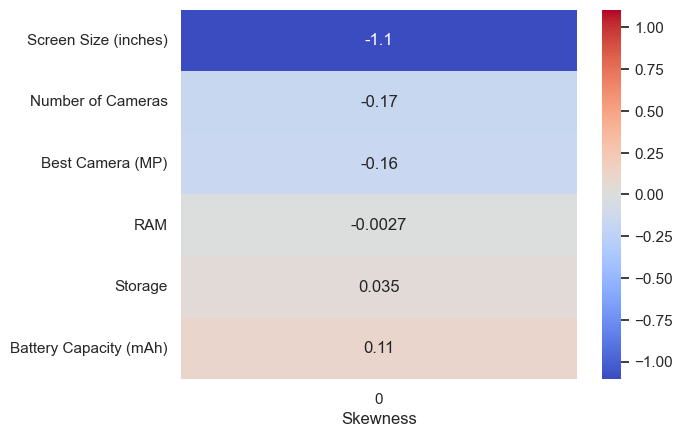

In [45]:
skewness_df = pd.DataFrame(train[train_num_features].skew().sort_values())
center_value = 0

sns.heatmap(skewness_df, cmap='coolwarm', annot=True, cbar=True,
            center=center_value, vmin=-abs(skewness_df).max().max(), vmax=abs(skewness_df).max().max())

plt.xlabel('Skewness')

plt.show()

In [46]:
train.corr()

,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),Number of Cameras,Best Camera (MP)
Storage,1.000000,0.748404,0.312304,-0.065187,0.652101,0.368163,0.496558
RAM,0.748404,1.000000,0.348506,-0.039654,0.590047,0.401300,0.598529
Screen Size (inches),0.312304,0.348506,1.000000,0.494810,0.119009,0.398478,0.474089
Battery Capacity (mAh),-0.065187,-0.039654,0.494810,1.000000,-0.396041,0.307119,0.257763
Price ($),0.652101,0.590047,0.119009,-0.396041,1.000000,0.080998,0.164190
Number of Cameras,0.368163,0.401300,0.398478,0.307119,0.080998,1.000000,0.475956
Best Camera (MP),0.496558,0.598529,0.474089,0.257763,0.164190,0.475956,1.000000


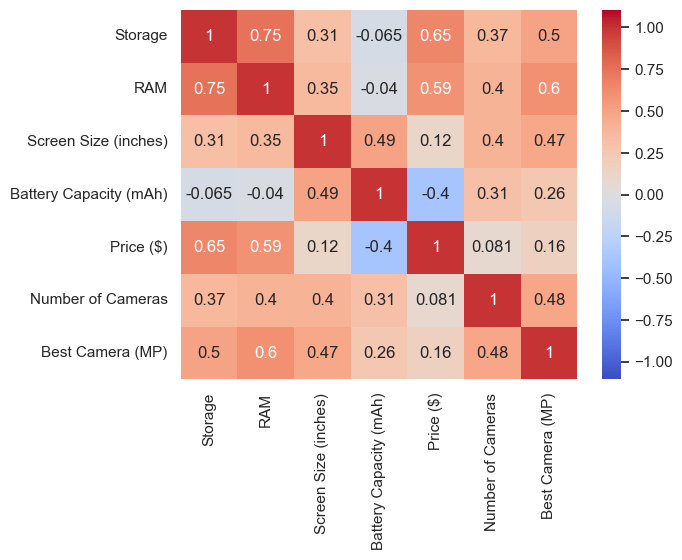

In [47]:
heatmap = sns.heatmap(train.corr(), cmap='coolwarm', annot=True,
                      cbar=True, center=center_value,
                      vmin=-abs(skewness_df).max().max(), vmax=abs(skewness_df).max().max())

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Pipelines</h1>

* ***<span style='color:#ff0000;'>So before we build our pipelines i will put the approches we may go with to try them all with our pipelines</span>***
    * *At first we want to fix the data types of our data and we used 3 functions to do it*
    * *we may drop columns like the model column*
    * *we may drop some of the outliers*
    * *we will need to impute the nan values*
    * *we need to do the box-cox transformation to fix the data skewness*
    * *we created 2 new columns and dropped one*
    * *we will need some scaling methods like robust and standard scaling*
    * *we will need some encoding methods like ordinal and one hot encoding*
    
* ***<span style='color:#ff0000;'>So we will try to build classes that does these approches we want to take then we will build different pipelines and choose the best one of them</span>***

In [48]:
"""
Pipeline 1:
Datatypefix :['Storage','RAM','Screen Size (inches)','Price ($)']
CameraMegapixelsExtractor :
ColumnSelector : all
LabelEncodeColumns : ['Brand','Model']
BoxcoxTransform : ['Storage','RAM','Screen Size (inches)','Battery Capacity (mAh)','Best Camera (MP)','Number of Cameras']
DropColumnsTransformer : none
StandardScaleTransform :['Storage','RAM','Screen Size (inches)','Battery Capacity (mAh)','Best Camera (MP)','Number of Cameras']

Pipeline 2:
Datatypefix :['Storage','RAM','Screen Size (inches)','Price ($)']
CameraMegapixelsExtractor :
ColumnSelector : all
LabelEncodeColumns : ['Brand','Model']
BoxcoxTransform : ['Storage','RAM','Screen Size (inches)','Battery Capacity (mAh)','Best Camera (MP)','Number of Cameras']
DropColumnsTransformer : none
RobustScaleTransform :['Storage','RAM','Screen Size (inches)','Battery Capacity (mAh)','Best Camera (MP)','Number of Cameras']

Pipeline 3:
Datatypefix :['Storage','RAM','Screen Size (inches)','Price ($)']
CameraMegapixelsExtractor :
ColumnSelector : all
LabelEncodeColumns : 'Brand'
BoxcoxTransform : ['Storage','RAM','Screen Size (inches)','Battery Capacity (mAh)','Best Camera (MP)','Number of Cameras']
DropColumnsTransformer : 'Model'
StandardScaleTransform :['Storage','RAM','Screen Size (inches)','Battery Capacity (mAh)','Best Camera (MP)','Number of Cameras']
    
Pipeline 4:
Datatypefix :['Storage','RAM','Screen Size (inches)','Price ($)']
CameraMegapixelsExtractor :
ColumnSelector : all
LabelEncodeColumns : 'Brand'
BoxcoxTransform : ['Storage','RAM','Screen Size (inches)','Battery Capacity (mAh)','Best Camera (MP)','Number of Cameras']
DropColumnsTransformer : 'Model'
RobustScaleTransform :['Storage','RAM','Screen Size (inches)','Battery Capacity (mAh)','Best Camera (MP)','Number of Cameras']

"""

"\nPipeline 1:\nDatatypefix :['Storage','RAM','Screen Size (inches)','Price ($)']\nCameraMegapixelsExtractor :\nColumnSelector : all\nLabelEncodeColumns : ['Brand','Model']\nBoxcoxTransform : ['Storage','RAM','Screen Size (inches)','Battery Capacity (mAh)','Best Camera (MP)','Number of Cameras']\nDropColumnsTransformer : none\nStandardScaleTransform :['Storage','RAM','Screen Size (inches)','Battery Capacity (mAh)','Best Camera (MP)','Number of Cameras']\n\nPipeline 2:\nDatatypefix :['Storage','RAM','Screen Size (inches)','Price ($)']\nCameraMegapixelsExtractor :\nColumnSelector : all\nLabelEncodeColumns : ['Brand','Model']\nBoxcoxTransform : ['Storage','RAM','Screen Size (inches)','Battery Capacity (mAh)','Best Camera (MP)','Number of Cameras']\nDropColumnsTransformer : none\nRobustScaleTransform :['Storage','RAM','Screen Size (inches)','Battery Capacity (mAh)','Best Camera (MP)','Number of Cameras']\n\nPipeline 3:\nDatatypefix :['Storage','RAM','Screen Size (inches)','Price ($)']\nCam

In [49]:
import My_Pipelines
My_Pipelines

<module 'My_Pipelines' from 'C:\\Users\\Elsafwa\\My_Pipelines.py'>

In [50]:
models = []

models.append(RandomForestRegressor())
models.append(LGBMRegressor())
models.append(HistGradientBoostingRegressor())
models.append(ExtraTreesRegressor())
models.append(BaggingRegressor())
models.append(GradientBoostingRegressor())
models.append(XGBRegressor())

model_names = ["RandomForestRegressor","LGBMRegressor","HistGradientBoostingRegressor","ExtraTreesRegressor",
               "BaggingRegressor","GradientBoostingRegressor","XGBRegressor"]

In [51]:
from My_Pipelines import FullPipeline1, FullPipeline2, FullPipeline3, FullPipeline4, ModelEvaluate

* ***First pipeline***

In [52]:
full_pipeline1 = FullPipeline1()
X_train1, y_train1 = full_pipeline1.fit_transform(X_train, y_train)

full_pipeline1.full_pipeline

Pipeline(steps=[('selector', ColumnSelector()),
                ('data_fix',
                 Datatypefix(cols_to_process=['Storage', 'RAM',
                                              'Screen Size (inches)'])),
                ('camera_extraction', CameraMegapixelsExtractor()),
                ('drop_cols', DropColumnsTransformer(cols=['Camera (MP)'])),
                ('power_transformation',
                 BoxcoxTransform(cols=['Storage', 'RAM', 'Screen Size (inches)',
                                       'Battery Capacity (mAh)',
                                       'Best Camera (MP)',
                                       'Number of Cameras'])),
                ('label_encode', LabelEncodeColumns(cols=['Brand', 'Model'])),
                ('scale',
                 StandardScaleTransform(cols=['Storage', 'RAM',
                                              'Screen Size (inches)',
                                              'Battery Capacity (mAh)',
                                              'Best Camera (MP)',
                                              'Number of Cameras']))])

In [53]:
models_evaluate = ModelEvaluate(models)
models_evaluate.fit(X_train1, y_train1)
results = models_evaluate.get_results()

results

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 243, number of used features: 8
[LightGBM] [Info] Start training from score 411.102881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

,model,mean_mae,mean_rmse,mean_r2,time
0,RandomForestRegressor,73.526406,135.192465,0.801436,1.262271
1,LGBMRegressor,80.848810,131.916168,0.812685,0.169342
2,HistGradientBoostingRegressor,81.311448,135.391674,0.805162,0.608650
3,ExtraTreesRegressor,68.320197,122.198829,0.838239,0.906480
4,BaggingRegressor,72.842837,134.146475,0.807216,0.189906
5,GradientBoostingRegressor,74.639820,129.115607,0.818179,0.457738
6,XGBRegressor,75.803058,141.180480,0.777362,0.282825


* ***Second pipeline***

In [54]:
full_pipeline2 = FullPipeline2()
X_train2, y_train2 = full_pipeline2.fit_transform(X_train, y_train)
full_pipeline2.full_pipeline

Pipeline(steps=[('selector', ColumnSelector()),
                ('data_fix',
                 Datatypefix(cols_to_process=['Storage', 'RAM',
                                              'Screen Size (inches)'])),
                ('camera_extraction', CameraMegapixelsExtractor()),
                ('drop_cols', DropColumnsTransformer(cols=['Camera (MP)'])),
                ('power_transformation',
                 BoxcoxTransform(cols=['Storage', 'RAM', 'Screen Size (inches)',
                                       'Battery Capacity (mAh)',
                                       'Best Camera (MP)',
                                       'Number of Cameras'])),
                ('label_encode', LabelEncodeColumns(cols=['Brand', 'Model'])),
                ('scale',
                 RobustScaleTransform(cols=['Storage', 'RAM',
                                            'Screen Size (inches)',
                                            'Battery Capacity (mAh)',
                                            'Best Camera (MP)',
                                            'Number of Cameras']))])

In [55]:
models_evaluate = ModelEvaluate(models)
models_evaluate.fit(X_train2, y_train2)
results = models_evaluate.get_results()

results

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 243, number of used features: 8
[LightGBM] [Info] Start training from score 411.102881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

,model,mean_mae,mean_rmse,mean_r2,time
0,RandomForestRegressor,71.871654,133.334361,0.806525,1.266289
1,LGBMRegressor,81.109084,132.197816,0.811815,0.119917
2,HistGradientBoostingRegressor,81.311448,135.391674,0.805162,0.569672
3,ExtraTreesRegressor,67.072698,119.403889,0.847242,0.893490
4,BaggingRegressor,73.999661,136.218551,0.799241,0.186906
5,GradientBoostingRegressor,74.767528,129.967643,0.816309,0.450741
6,XGBRegressor,75.803058,141.180480,0.777362,0.277828


* ***Third pipeline***

In [56]:
full_pipeline3 = FullPipeline3()
X_train3, y_train3 = full_pipeline3.fit_transform(X_train, y_train)

full_pipeline3.full_pipeline

Pipeline(steps=[('selector', ColumnSelector()),
                ('data_fix',
                 Datatypefix(cols_to_process=['Storage', 'RAM',
                                              'Screen Size (inches)'])),
                ('camera_extraction', CameraMegapixelsExtractor()),
                ('drop_cols',
                 DropColumnsTransformer(cols=['Model', 'Camera (MP)'])),
                ('power_transformation',
                 BoxcoxTransform(cols=['Storage', 'RAM', 'Screen Size (inches)',
                                       'Battery Capacity (mAh)',
                                       'Best Camera (MP)',
                                       'Number of Cameras'])),
                ('label_encode', LabelEncodeColumns(cols=['Brand'])),
                ('scale',
                 StandardScaleTransform(cols=['Storage', 'RAM',
                                              'Screen Size (inches)',
                                              'Battery Capacity (mAh)',
                                              'Best Camera (MP)',
                                              'Number of Cameras']))])

In [57]:
models_evaluate = ModelEvaluate(models)
models_evaluate.fit(X_train3, y_train3)
results = models_evaluate.get_results()

results

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 243, number of used features: 7
[LightGBM] [Info] Start training from score 411.102881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,model,mean_mae,mean_rmse,mean_r2,time
0,RandomForestRegressor,72.500290,133.599702,0.806785,1.060392
1,LGBMRegressor,79.957488,129.458430,0.817094,0.128925
2,HistGradientBoostingRegressor,78.786620,129.109466,0.818724,0.528697
3,ExtraTreesRegressor,67.895897,121.466848,0.839783,0.790561
4,BaggingRegressor,76.261492,138.217612,0.792453,0.155911
5,GradientBoostingRegressor,72.877141,126.493161,0.824051,0.390762
6,XGBRegressor,72.926923,137.645403,0.784699,0.330809


* ***Fourth pipeline***

In [58]:
full_pipeline4 = FullPipeline4()
X_train4, y_train4 = full_pipeline4.fit_transform(X_train, y_train)

full_pipeline4.full_pipeline

Pipeline(steps=[('selector', ColumnSelector()),
                ('data_fix',
                 Datatypefix(cols_to_process=['Storage', 'RAM',
                                              'Screen Size (inches)'])),
                ('camera_extraction', CameraMegapixelsExtractor()),
                ('drop_cols',
                 DropColumnsTransformer(cols=['Model', 'Camera (MP)'])),
                ('power_transformation',
                 BoxcoxTransform(cols=['Storage', 'RAM', 'Screen Size (inches)',
                                       'Battery Capacity (mAh)',
                                       'Best Camera (MP)',
                                       'Number of Cameras'])),
                ('label_encode', LabelEncodeColumns(cols=['Brand'])),
                ('scale',
                 RobustScaleTransform(cols=['Storage', 'RAM',
                                            'Screen Size (inches)',
                                            'Battery Capacity (mAh)',
                                            'Best Camera (MP)',
                                            'Number of Cameras']))])

In [59]:
models_evaluate = ModelEvaluate(models)
models_evaluate.fit(X_train4, y_train4)
results = models_evaluate.get_results()

results

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 243, number of used features: 7
[LightGBM] [Info] Start training from score 411.102881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,model,mean_mae,mean_rmse,mean_r2,time
0,RandomForestRegressor,71.806962,132.523454,0.808403,1.057407
1,LGBMRegressor,80.238601,130.239540,0.814733,0.134909
2,HistGradientBoostingRegressor,78.786620,129.109466,0.818724,0.554680
3,ExtraTreesRegressor,68.259634,123.476602,0.835065,0.748586
4,BaggingRegressor,72.398646,135.913141,0.800840,0.157909
5,GradientBoostingRegressor,72.505294,125.784292,0.826678,0.362792
6,XGBRegressor,72.926923,137.645403,0.784699,0.202871


<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Our Model</h1>

In [60]:
full_pipeline = FullPipeline3()
X_train, y_train = full_pipeline.fit_transform(X_train, y_train)
X_test, y_test = full_pipeline.transform(X_test, y_test)

In [61]:
X_train.head()

,Brand,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Number of Cameras,Best Camera (MP)
80,4,0.254689,0.936270,-0.815243,-0.193642,-1.415123,0.359874
276,12,-2.101774,-2.336900,-0.815243,-0.918419,-0.267614,-1.328473
95,14,0.254689,0.936270,1.110133,0.344048,-0.267614,0.359874
402,12,0.254689,0.936270,-0.771878,-0.568312,-0.267614,0.845704
284,14,-1.015879,-0.726704,1.084664,0.344048,-0.267614,-1.328473


In [62]:
y_train.head()

,Price ($)
80,699
276,129
95,269
402,1049
284,189


In [63]:
from My_Pipelines import RegressionPlot

In [64]:
rf = ExtraTreesRegressor()
rf.fit(X_train, y_train)

train_score = rf.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = rf.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 7.227302631578948
MAE on cross-validation set: 67.99784153005464
MAE on test set: 365.74192640692644


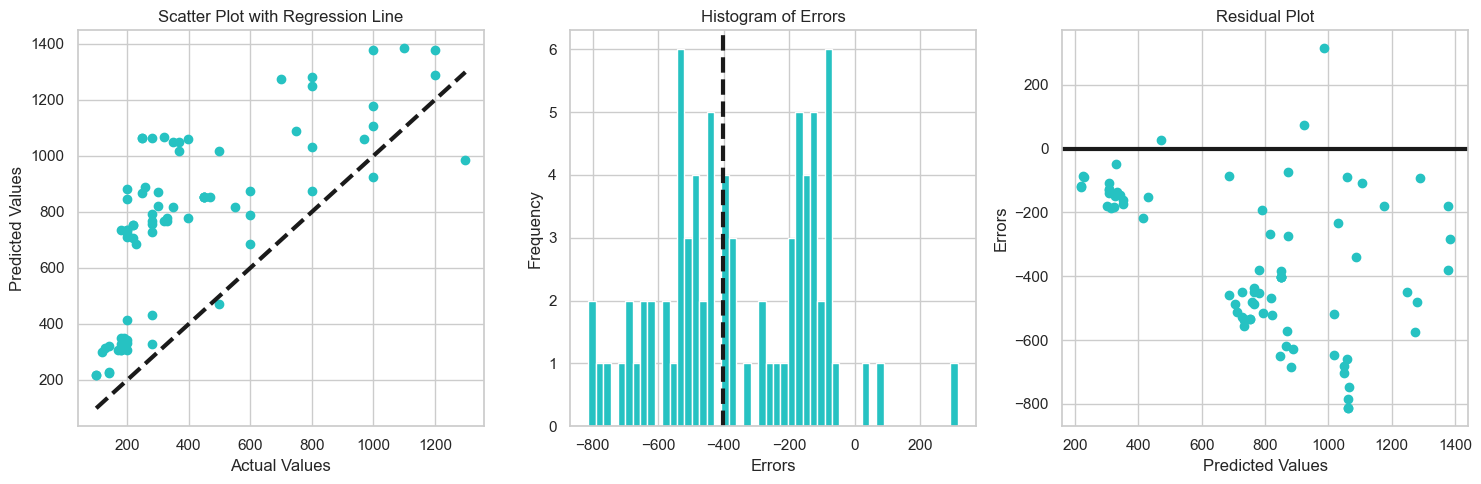

In [65]:
plot = RegressionPlot(y_test, y_pred, color='#26c2c2')
plot.plot()